In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
import seaborn
import glob
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [2]:
# load in the data
data_60s = pd.read_csv('spotify-data/dataset-of-60s.csv')
data_70s = pd.read_csv('spotify-data/dataset-of-70s.csv')
data_80s = pd.read_csv('spotify-data/dataset-of-80s.csv')
data_90s = pd.read_csv('spotify-data/dataset-of-90s.csv')
data_00s = pd.read_csv('spotify-data/dataset-of-00s.csv')
data_10s = pd.read_csv('spotify-data/dataset-of-10s.csv')

In [3]:
# combined all data into a single dataframe
data_all = pd.concat([data_00s, data_10s, data_60s, data_70s, data_80s, data_90s])

In [4]:
# print the first 5 samples
data_all.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Lucky Man,Montgomery Gentry,spotify:track:4GiXBCUF7H6YfNQsnBRIzl,0.578,0.471,4,-7.270,1,0.0289,0.368000,0.00000,0.159,0.532,133.061,196707,4,30.88059,13,1
1,On The Hotline,Pretty Ricky,spotify:track:1zyqZONW985Cs4osz9wlsu,0.704,0.854,10,-5.477,0,0.1830,0.018500,0.00000,0.148,0.688,92.988,242587,4,41.51106,10,1
2,Clouds Of Dementia,Candlemass,spotify:track:6cHZf7RbxXCKwEkgAZT4mY,0.162,0.836,9,-3.009,1,0.0473,0.000111,0.00457,0.174,0.300,86.964,338893,4,65.32887,13,0
3,"Heavy Metal, Raise Hell!",Zwartketterij,spotify:track:2IjBPp2vMeX7LggzRN3iSX,0.188,0.994,4,-3.745,1,0.1660,0.000007,0.07840,0.192,0.333,148.440,255667,4,58.59528,9,0
4,I Got A Feelin',Billy Currington,spotify:track:1tF370eYXUcWwkIvaq3IGz,0.630,0.764,2,-4.353,1,0.0275,0.363000,0.00000,0.125,0.631,112.098,193760,4,22.62384,10,1


In [5]:
# print information of the dataframe
data_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41106 entries, 0 to 5519
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             41106 non-null  object 
 1   artist            41106 non-null  object 
 2   uri               41106 non-null  object 
 3   danceability      41106 non-null  float64
 4   energy            41106 non-null  float64
 5   key               41106 non-null  int64  
 6   loudness          41106 non-null  float64
 7   mode              41106 non-null  int64  
 8   speechiness       41106 non-null  float64
 9   acousticness      41106 non-null  float64
 10  instrumentalness  41106 non-null  float64
 11  liveness          41106 non-null  float64
 12  valence           41106 non-null  float64
 13  tempo             41106 non-null  float64
 14  duration_ms       41106 non-null  int64  
 15  time_signature    41106 non-null  int64  
 16  chorus_hit        41106 non-null  float64

In [6]:
# print count of target where 1 is a hit and 0 is a flop
data_all['target'].value_counts()

1    20553
0    20553
Name: target, dtype: int64

In [7]:
# print count of features columns with null values
data_all.isnull().sum()

track               0
artist              0
uri                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
target              0
dtype: int64

In [8]:
# def run_spearmanr(a):
#    r = stats.spearmanr(a=data_all[a], b=data_all['target'])
#    print(30*"-")
#    print(f"{a}")
#    print("   Correlation: {:f}".format(r.correlation))
#    print('   P-value: {:f}'.format(r.pvalue))

In [9]:
# print(f'Spearmanr results for correlation between columns and song success')

# removed_cols = data_all.drop(columns=['target', 'uri'])
# for col in removed_cols:
#    run_spearmanr(col)

# Data analysis

In [10]:
data_60s['decade'] = '60s'
data_70s['decade'] = '70s'
data_80s['decade'] = '80s'
data_90s['decade'] = '90s'
data_00s['decade'] = '00s'
data_10s['decade'] = '10s'
data_all_analysis = pd.concat([data_60s, data_70s, data_80s, data_90s, data_00s, data_10s])

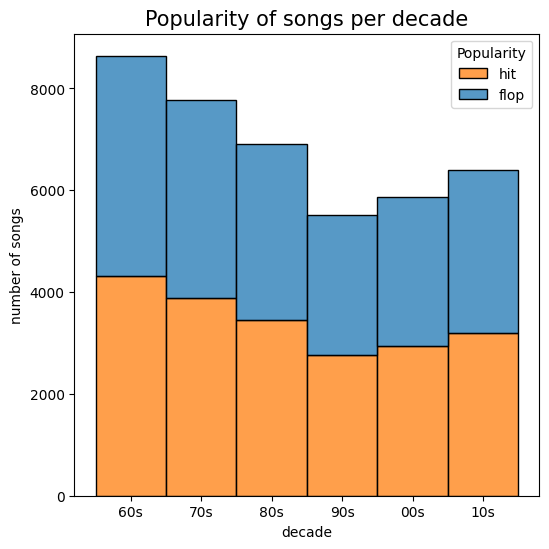

In [11]:
plt.figure(figsize=(6,6))
seaborn.histplot(data=data_all_analysis, x='decade', hue="target", element='bars', multiple='stack', stat='count')
plt.title('Popularity of songs per decade', fontsize=15)
plt.ylabel('number of songs')
plt.legend(title='Popularity', labels=['hit', 'flop'])
plt.show()

In [12]:
# plt.figure(figsize=(6,6))
# seaborn.displot(data=data_all_analysis, x='instrumentalness', hue='target', kind="kde")
# plt.title('Stroke vs no stroke by BMI', fontsize=15)
# plt.ylabel('number of songs')
# plt.legend(title='Popularity', labels=['hit', 'flop'])
# plt.show()

# Scaling and splitting data

In [13]:
from sklearn.preprocessing import scale 
y = data_all['target']
X_unscaled = data_all.drop(['track', 'artist', 'uri', 'target'], axis=1)
X = pd.DataFrame(scale(X_unscaled), columns=X_unscaled.columns)

In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41106 entries, 0 to 41105
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      41106 non-null  float64
 1   energy            41106 non-null  float64
 2   key               41106 non-null  float64
 3   loudness          41106 non-null  float64
 4   mode              41106 non-null  float64
 5   speechiness       41106 non-null  float64
 6   acousticness      41106 non-null  float64
 7   instrumentalness  41106 non-null  float64
 8   liveness          41106 non-null  float64
 9   valence           41106 non-null  float64
 10  tempo             41106 non-null  float64
 11  duration_ms       41106 non-null  float64
 12  time_signature    41106 non-null  float64
 13  chorus_hit        41106 non-null  float64
 14  sections          41106 non-null  float64
dtypes: float64(15)
memory usage: 4.7 MB


In [15]:
y.shape, X.shape

((41106,), (41106, 15))

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=2022, stratify=y)

In [17]:
y_train.value_counts()

0    18498
1    18497
Name: target, dtype: int64

In [18]:
y_test.value_counts()

1    2056
0    2055
Name: target, dtype: int64

# Preparing model evaluation functions

In [19]:
from sklearn.metrics import confusion_matrix
def plot_conf_mat(y_test, y_pred):
    conf_mat = confusion_matrix(y_test, y_pred)

    group_names = ['True Negatives', 'False Positives', 'False Negatives', 'True Positives']
    group_counts = ['{0:0.0f}'.format(value) for value in conf_mat.flatten()]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names, group_counts)]
    labels = np.asarray(labels).reshape(2,2)

    plt.figure(figsize=(8,8))
    seaborn.heatmap(conf_mat, annot=labels, fmt='', cmap='Blues')
    plt.show()

In [20]:
from sklearn.metrics import classification_report
def report_classification_performance(y_test, y_pred):
    print(classification_report(y_test, y_pred))

In [21]:
from sklearn.metrics import accuracy_score
def report_accuracy_performance(y_test, y_pred):
    acc = accuracy_score(y_test, y_pred)
    print(f'Accuracy score: {acc}')

In [22]:
from sklearn.metrics import roc_auc_score
def report_auc_performance(y_test, y_pred):
    roc_auc = roc_auc_score(y_test, y_pred)
    print(f'AUC score: {roc_auc}')

In [23]:
def feature_importance(model):
    return pd.DataFrame({'Feature':X.columns, 'Importance':model.feature_importances_}).sort_values('Importance', ascending=False)

# Decision Tree Classification

              precision    recall  f1-score   support

           0       0.70      0.70      0.70      2055
           1       0.70      0.70      0.70      2056

    accuracy                           0.70      4111
   macro avg       0.70      0.70      0.70      4111
weighted avg       0.70      0.70      0.70      4111

Accuracy score: 0.7027487229384578
AUC score: 0.7027489420318669


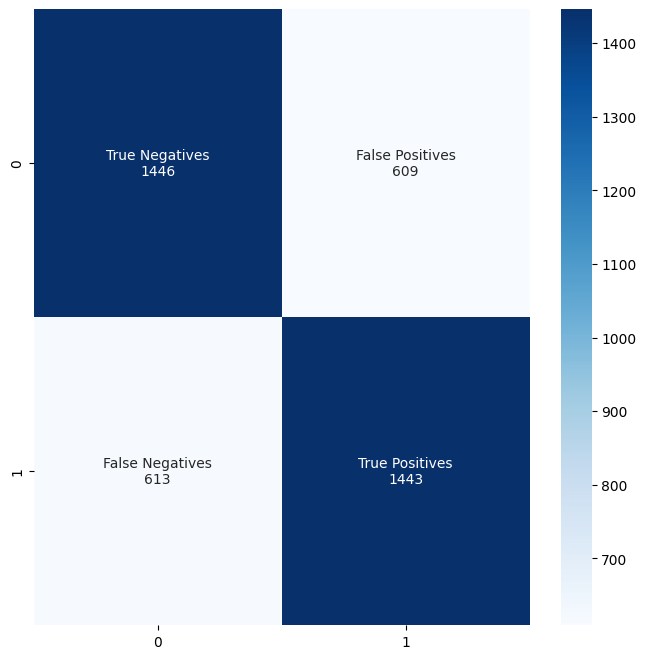

,Feature,Importance
7,instrumentalness,0.231373
6,acousticness,0.109179
0,danceability,0.095840
5,speechiness,0.079821
1,energy,0.073293
11,duration_ms,0.073280
9,valence,0.059398
3,loudness,0.058279
10,tempo,0.057160
13,chorus_hit,0.048546


In [24]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=2022)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
report_classification_performance(y_test, y_pred)
report_accuracy_performance(y_test, y_pred)
report_auc_performance(y_test, y_pred)
plot_conf_mat(y_test, y_pred)
feature_importance(model)

# Random Forest Classification

              precision    recall  f1-score   support

           0       0.83      0.76      0.79      2055
           1       0.78      0.84      0.81      2056

    accuracy                           0.80      4111
   macro avg       0.80      0.80      0.80      4111
weighted avg       0.80      0.80      0.80      4111

Accuracy score: 0.7985891510581367
AUC score: 0.7985791985003835


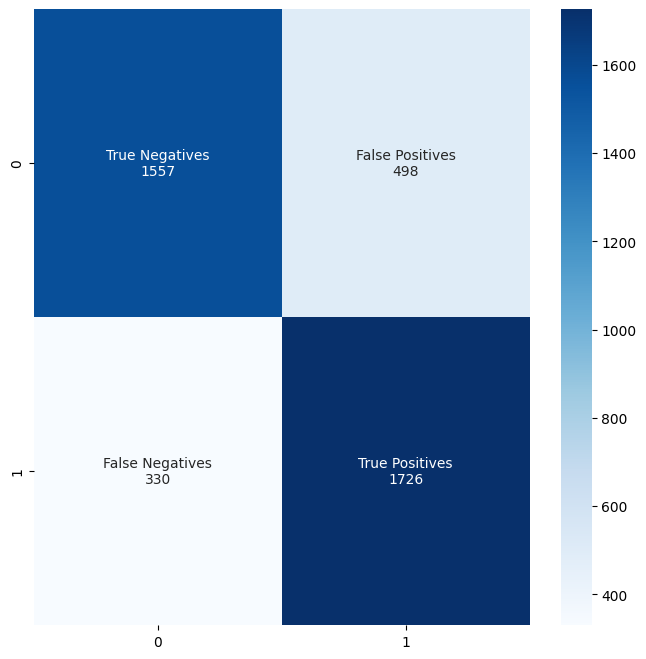

,Feature,Importance
7,instrumentalness,0.168603
6,acousticness,0.109367
0,danceability,0.102049
1,energy,0.085135
11,duration_ms,0.077564
3,loudness,0.074851
5,speechiness,0.073845
9,valence,0.068643
10,tempo,0.054445
8,liveness,0.050892


In [25]:
from sklearn.ensemble import RandomForestClassifier
del model
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
report_classification_performance(y_test, y_pred)
report_accuracy_performance(y_test, y_pred)
report_auc_performance(y_test, y_pred)
plot_conf_mat(y_test, y_pred)
feature_importance(model)

# Gradient Boosting Classifier

              precision    recall  f1-score   support

           0       0.82      0.71      0.76      2055
           1       0.75      0.85      0.79      2056

    accuracy                           0.78      4111
   macro avg       0.78      0.78      0.78      4111
weighted avg       0.78      0.78      0.78      4111

Accuracy score: 0.779615665288251
AUC score: 0.7795992028553306


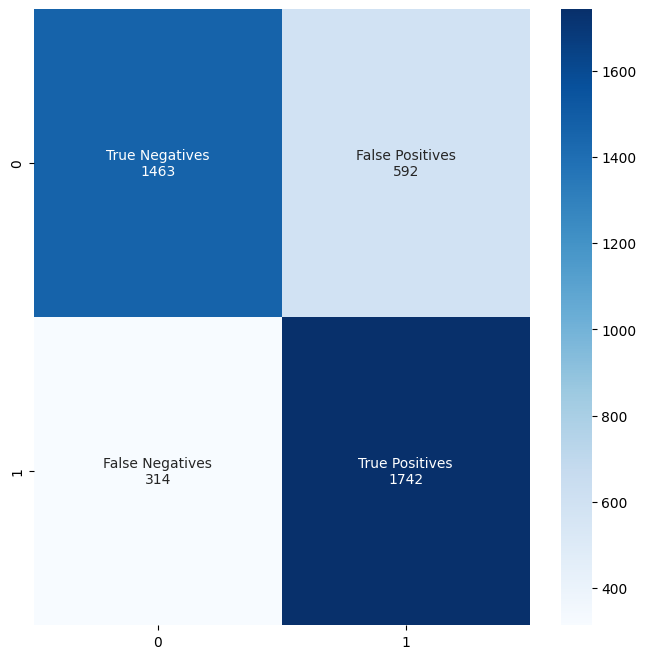

,Feature,Importance
7,instrumentalness,0.477078
6,acousticness,0.144716
0,danceability,0.121795
5,speechiness,0.071480
11,duration_ms,0.057106
1,energy,0.037994
9,valence,0.031905
3,loudness,0.028059
4,mode,0.011215
10,tempo,0.006877


In [26]:
from sklearn.ensemble import GradientBoostingClassifier

del model
model = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
report_classification_performance(y_test, y_pred)
report_accuracy_performance(y_test, y_pred)
report_auc_performance(y_test, y_pred)
plot_conf_mat(y_test, y_pred)
feature_importance(model)

# Deep Neural Network

In [27]:
# Splitting training data into trainining (70% of data), validation (15% of data) and test (15% of data)
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.2, random_state=2022, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=2022, stratify=y_val_test)

In [28]:
print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(32884, 15) (4111, 15) (4111, 15)
(32884,) (4111,) (4111,)


## Utility functions

In [34]:
def plot_history(history):
    n_epoch = range(1, len(history.history['loss']) + 1)

    plt.figure(figsize=(6,6))

    seaborn.lineplot(data=history.history, x=n_epoch, y='accuracy', label='accuracy')
    seaborn.lineplot(data=history.history, x=n_epoch, y='val_accuracy', label='val_accuracy')
    seaborn.lineplot(data=history.history, x=n_epoch, y='loss', label='loss')

    plt.legend()
    plt.ylim([0,1])
    plt.ylabel(None)
    plt.xlabel('epochs')
    plt.title('Training history of Deep Neural Network', fontsize=15)
    plt.show()

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras.regularizers import l2

regularizer = l2(0.001)

model = Sequential()
model.add(Dense(64, activation='relu', kernel_regularizer=regularizer, input_shape=(15,)))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizer))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizer))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizer))
model.add(Dense(1, activation='sigmoid'))
model.compile(
    optimizer='adam', 
    loss='binary_crossentropy', 
        metrics=['accuracy'])


In [37]:
epochs = 30
batch_size = 300
history = model.fit(X_train, y_train,
             validation_data=(X_val, y_val),
             epochs=25,
             batch_size=300)

Epoch 1/25
110/110 [==============================] - 1s 3ms/step - loss: 0.7007 - accuracy: 0.7249 - val_loss: 0.6153 - val_accuracy: 0.7653
Epoch 2/25
110/110 [==============================] - 0s 2ms/step - loss: 0.5953 - accuracy: 0.7618 - val_loss: 0.5652 - val_accuracy: 0.7718
Epoch 3/25
110/110 [==============================] - 0s 2ms/step - loss: 0.5601 - accuracy: 0.7672 - val_loss: 0.5392 - val_accuracy: 0.7765
Epoch 4/25
110/110 [==============================] - 0s 2ms/step - loss: 0.5408 - accuracy: 0.7705 - val_loss: 0.5261 - val_accuracy: 0.7721
Epoch 5/25
110/110 [==============================] - 0s 2ms/step - loss: 0.5288 - accuracy: 0.7711 - val_loss: 0.5173 - val_accuracy: 0.7767
Epoch 6/25
110/110 [==============================] - 0s 2ms/step - loss: 0.5205 - accuracy: 0.7745 - val_loss: 0.5138 - val_accuracy: 0.7830
Epoch 7/25
110/110 [==============================] - 0s 2ms/step - loss: 0.5127 - accuracy: 0.7748 - val_loss: 0.5029 - val_accuracy: 0.7806
Epoch 

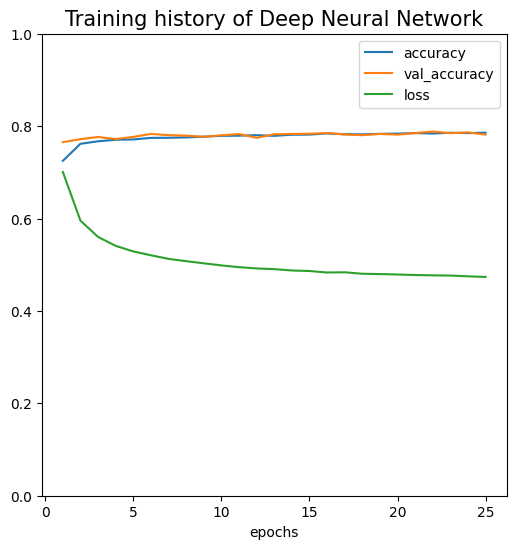

129/129 [==============================] - 0s 691us/step - loss: 0.4729 - accuracy: 0.7898


[0.4728850722312927, 0.7898321747779846]

In [38]:
plot_history(history)
model.evaluate(X_test, y_test)